# üìå **K-Nearest Neighbors (KNN) en Machine Learning**

## ‚úÖ **1. Conceptos Clave**

### üîπ ¬øQu√© es KNN?
K-Nearest Neighbors (KNN) es un algoritmo de **aprendizaje supervisado** utilizado para **clasificaci√≥n y regresi√≥n**. Su funcionamiento se basa en la similitud entre los datos: 
- **Clasificaci√≥n**: Asigna la clase m√°s frecuente entre los *k* vecinos m√°s cercanos. 
    Supongamos que est√°s en una fiesta y ves a un grupo de personas vestidas de manera similar y con temas de conversaci√≥n parecidos. T√∫ no sabes exactamente a qu√© grupo pertenecer√≠as, pero decides acercarte a las cinco personas m√°s cercanas y ver qu√© tienen en com√∫n.

    Si 3 de ellos est√°n vestidos con camisetas de bandas de rock y los otros 2 con ropa de deportes, es probable que elijas el grupo de rockeros porque son la mayor√≠a en tu vecindad.
    Esto es clasificaci√≥n: cada punto se asigna a la clase mayoritaria entre sus vecinos m√°s cercanos.

    **Ejemplo:**

    Si queremos clasificar correos electr√≥nicos como spam o no spam, el modelo observa los k correos m√°s similares (seg√∫n palabras, frecuencia, etc.) y asigna la categor√≠a m√°s com√∫n.


- **Regresi√≥n**: Calcula el promedio de los valores de los *k* vecinos m√°s cercanos.  
    Ahora imagina que est√°s en una ciudad desconocida y quieres estimar el precio de un caf√©. No sabes cu√°nto cuesta aqu√≠, pero observas los cinco caf√©s m√°s cercanos y ves que los precios son 2.50‚Ç¨, 2.80‚Ç¨, 2.60‚Ç¨, 3.00‚Ç¨ y 2.70‚Ç¨.

    En lugar de elegir un solo precio, tomas el promedio:
                (2.50 + 2.80 + 2.60 + 3.00 + 2.70) / 5 = 2.72‚Ç¨
    Esto es regresi√≥n: en lugar de asignar una clase, calculamos un valor num√©rico basado en los valores de los vecinos.

    **Ejemplo:**

    Si queremos predecir la temperatura de una ciudad en funci√≥n de datos hist√≥ricos de ciudades cercanas, KNN usa el promedio de las temperaturas de los k lugares m√°s cercanos.

### üîπ C√≥mo funciona KNN
1. Seleccionar hiperpar√°metros:  
    -K: N√∫mero de vecinos    
    -M√©trica de distancia: C√≥mo medir la similitud (Eucl√≠dea, Manhattan, etc.)   
    -Pesos: Uniforme (todos los vecinos contribuyen por igual) o basada en la distancia (los vecinos m√°s cercanos importan m√°s).   

2. Calcular distancias: Calcular las distancias entre la consulta y todos los puntos de entrenamiento.
3. Identificar los vecinos m√°s pr√≥ximos: Encuentra los K puntos de entrenamiento m√°s cercanos a la consulta.
4. Predecir: Utilizando la Media Simple o la Media Ponderada.

Aqu√≠ les dejo algunos gra√°ficos que demuestran por ejemplo el impacto de la definici√≥n de K en nuestro modelos.

Para modelo de Clasificaci√≥n ser√≠a:   

![KNN_Clasificaci√≥n](knn_classificaci√≥n.png)

Para modelos de Regresi√≥n ser√≠a:   

![KNN_Regresi√≥n](knn_regresi√≥n.png)

### üîπ Importancia de la Distancia en KNN
Dado que KNN es un algoritmo basado en proximidad, la m√©trica de distancia es crucial para su desempe√±o. Algunas opciones comunes son:

#### üî∏ **Distancia Euclidiana (m√°s utilizada)**
Es la distancia en l√≠nea recta entre dos puntos en un espacio n-dimensional:

$[
d(p, q) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2}
$]

‚úÖ Cu√°ndo usarla:

Cuando los datos est√°n normalizados o tienen escalas similares.
Si las dimensiones tienen un significado f√≠sico similar.
Cuando se trabaja con datos continuos, como im√°genes o datos biom√©tricos.
üö´ Cu√°ndo evitarla:
Si las variables tienen escalas muy diferentes (puede dar m√°s peso a las de mayor magnitud).
Si los datos son dispersos o categ√≥ricos.

#### üî∏ **Distancia Manhattan**
Es la suma de las diferencias absolutas entre las coordenadas de los puntos:

$[
d(p, q) = \sum_{i=1}^{n} |q_i - p_i|
$]

‚úÖ Cu√°ndo usarla:

Si los datos tienen alta dimensionalidad y son dispersos.
Cuando las caracter√≠sticas representan conteos o valores absolutos (por ejemplo, an√°lisis de tr√°fico en calles de una ciudad).
üö´ Cu√°ndo evitarla:
Si los datos son continuos y con valores similares en cada dimensi√≥n.

#### üî∏ **Distancia de Minkowski (Generalizaci√≥n de Euclidiana y Manhattan)**

$[
d(p, q) = \left( \sum_{i=1}^{n} |q_i - p_i|^p \right)^{1/p}
$]

Cuando $( p = 1 $), es la distancia Manhattan. Cuando $( p = 2 $), es la distancia Euclidiana.

‚úÖ Cu√°ndo usarla:

Si se quiere probar distintas distancias variando el par√°metro ùëù (por ejemplo,ùëù=1 da Manhattan y ùëù=2 da Euclidiana).
üö´ Cu√°ndo evitarla:
Si no se tiene una idea clara de qu√© m√©trica se adapta mejor a los datos

#### üî∏ **Distancia de Coseno**
Mide la diferencia entre dos vectores bas√°ndose en el √°ngulo entre ellos, en lugar de la magnitud:

$[
\text{similaridad} = \frac{A \cdot B}{||A|| \times ||B||}
$]

‚úÖ Cu√°ndo usarla:

Cuando los datos son representados como vectores de texto o embeddings.
Para modelos de recomendaci√≥n y NLP (An√°lisis de Sentimiento, TF-IDF, Word2Vec).
üö´ Cu√°ndo evitarla:
Si la magnitud de los valores es importante (coseno ignora la magnitud y solo mide la orientaci√≥n).

#### üî∏ **Distancia de Hamming (Para datos categ√≥ricos)**
‚úÖ Cu√°ndo usarla:

Si los datos son binarios o categ√≥ricos, como cadenas de ADN o datos de respuestas de encuestas.
En problemas de detecci√≥n de errores en c√≥digos binarios.
üö´ Cu√°ndo evitarla:
Si los datos son num√©ricos o continuos.


> **Nota:** La elecci√≥n de la m√©trica depende del tipo de datos. Por ejemplo, la distancia euclidiana es √∫til cuando los datos est√°n normalizados, mientras que la de coseno se usa en modelos de texto.

---



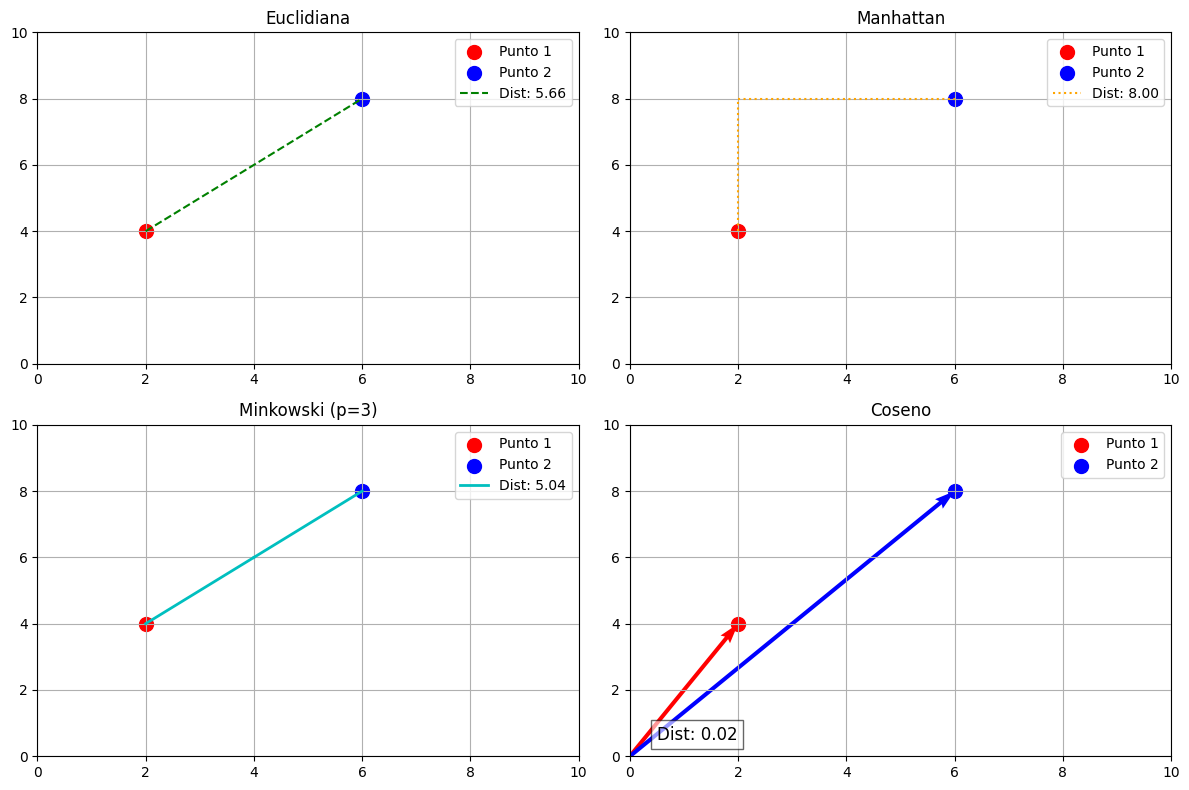

üìå Euclidiana: 5.66
üìå Manhattan: 8.00
üìå Minkowski (p=3): 5.04
üìå Coseno: 0.02


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean, cityblock, chebyshev, minkowski, cosine

# Definir dos puntos
p1 = np.array([2, 4])
p2 = np.array([6, 8])

# Calcular distancias
distances = {
    "Euclidiana": euclidean(p1, p2),
    "Manhattan": cityblock(p1, p2),
    "Minkowski (p=3)": minkowski(p1, p2, 3),
    "Coseno": cosine(p1, p2),
}

# Configurar gr√°fico
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
titles = list(distances.keys())

# Graficar diferentes distancias
for i, (title, dist) in enumerate(distances.items()):
    ax = axes[i]
    ax.scatter(*p1, color='red', label="Punto 1", s=100)
    ax.scatter(*p2, color='blue', label="Punto 2", s=100)

    # Euclidiana (l√≠nea recta)
    if title == "Euclidiana":
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g--', label=f"Dist: {dist:.2f}")

    # Manhattan (movimiento en L)
    elif title == "Manhattan":
        ax.plot([p1[0], p1[0]], [p1[1], p2[1]], 'orange', linestyle='dotted')
        ax.plot([p1[0], p2[0]], [p2[1], p2[1]], 'orange', linestyle='dotted', label=f"Dist: {dist:.2f}")

    # Minkowski con p=3
    elif title == "Minkowski (p=3)":
        ax.plot([p1[0], (p1[0] + p2[0]) / 2], [p1[1], (p1[1] + p2[1]) / 2], 'c-', linewidth=2)
        ax.plot([(p1[0] + p2[0]) / 2, p2[0]], [(p1[1] + p2[1]) / 2, p2[1]], 'c-', linewidth=2, label=f"Dist: {dist:.2f}")

    # Coseno (√°ngulo entre vectores)
    elif title == "Coseno":
        ax.quiver(0, 0, p1[0], p1[1], color='red', angles='xy', scale_units='xy', scale=1)
        ax.quiver(0, 0, p2[0], p2[1], color='blue', angles='xy', scale_units='xy', scale=1)
        ax.text(0.5, 0.5, f"Dist: {dist:.2f}", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
        
    ax.set_title(title)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

# Mostrar valores en consola
for name, value in distances.items():
    print(f"üìå {name}: {value:.2f}")



## ‚úÖ **2. Elecci√≥n del mejor *k***

Un valor de *k* peque√±o puede hacer que el modelo sea **demasiado sensible al ruido** (overfitting), mientras que un valor de *k* grande puede hacer que el modelo sea **demasiado general** (underfitting). 

### üìå Estrategias para elegir *k*
- **Regla emp√≠rica**: $( k \approx \sqrt{N} $) donde *N* es el n√∫mero de observaciones.
- **Validaci√≥n cruzada**: Probar varios valores de *k* y elegir el que tenga mejor desempe√±o.
- **Curva de error**: Graficar la tasa de error en funci√≥n de *k* y elegir el valor con menor error.   

## ‚úÖ **3. Implementaci√≥n en Python**

Vamos a aplicar KNN al dataset **Wine** de scikit-learn, que contiene caracter√≠sticas qu√≠micas de diferentes tipos de vino.


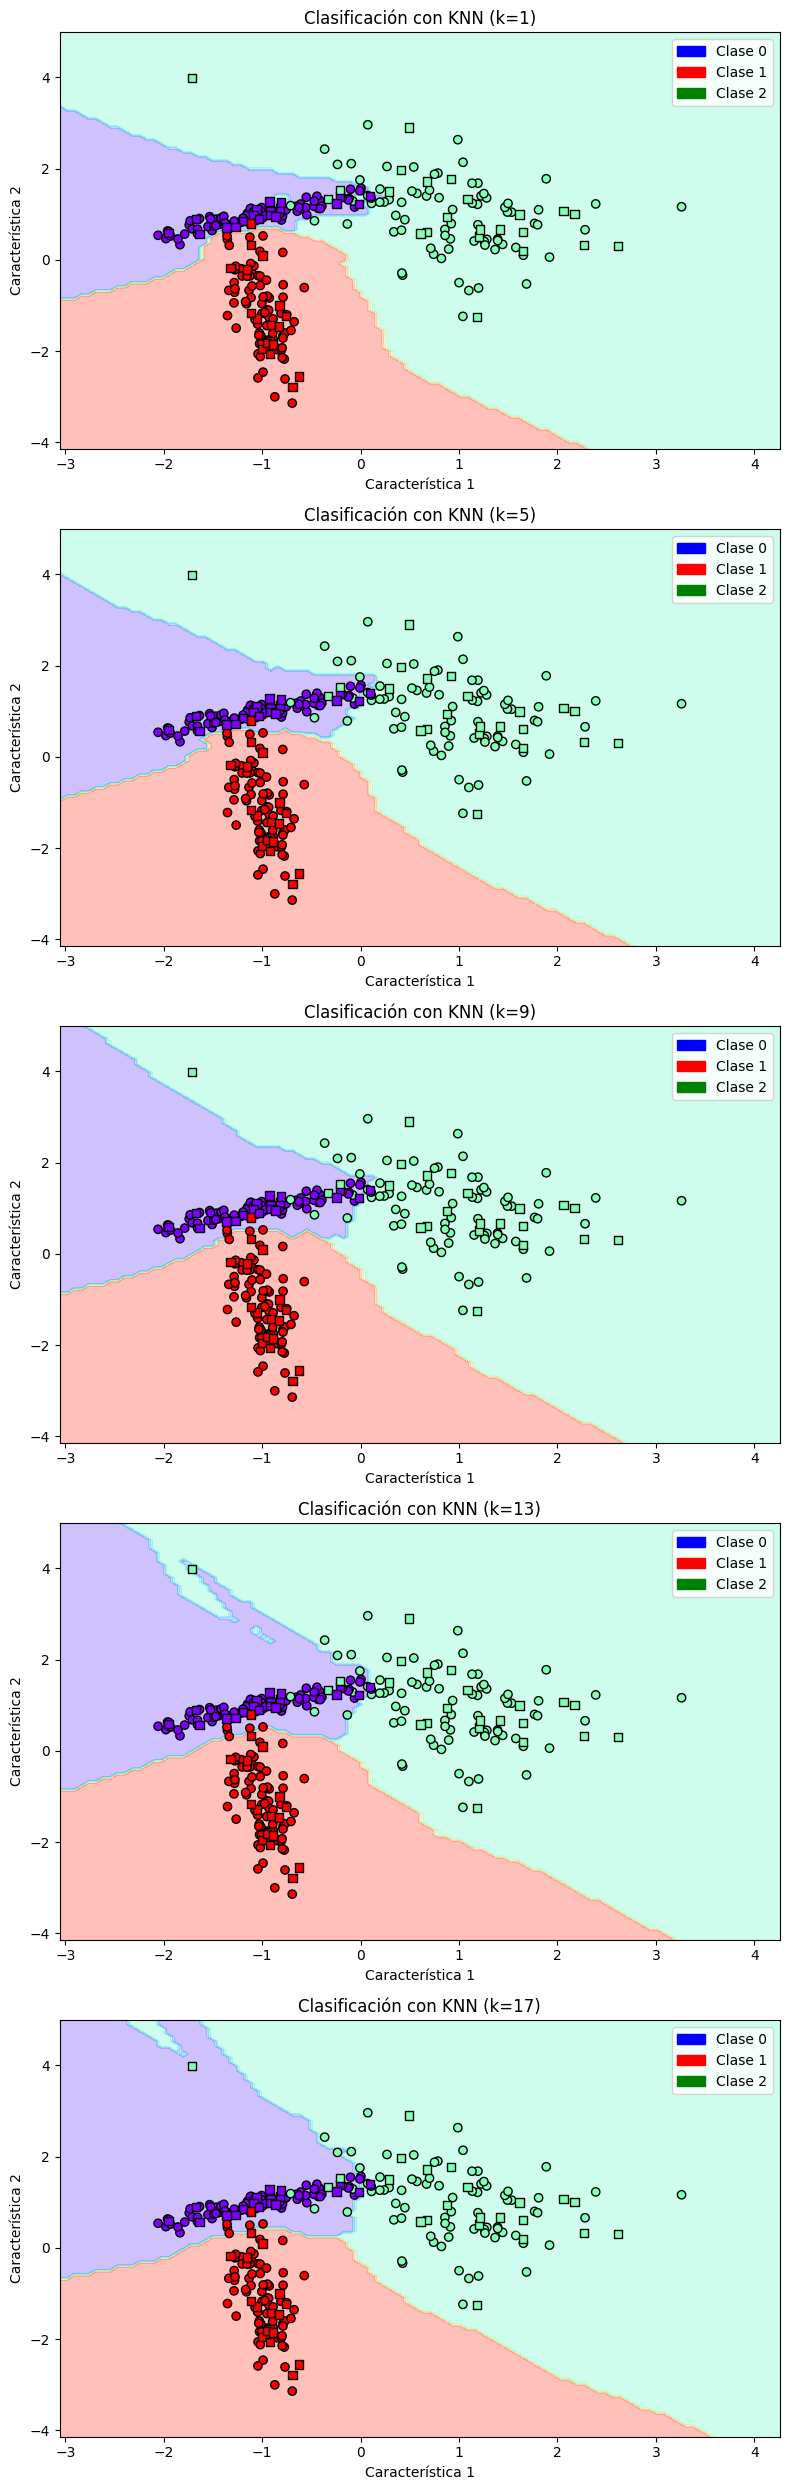

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

# Generar datos de ejemplo (3 clases)
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=3, 
                           n_clusters_per_class=1, random_state=42)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rango de valores de k a probar
k_range = range(1, 20,4)

# Crear figura para subgr√°ficas (una por cada valor de k)
n_k_values = len(k_range)
fig, axes = plt.subplots(n_k_values, 1, figsize=(8, 5 * n_k_values))  # Ajusta el tama√±o de la figura

# Iterar para cada valor de k
for i, k in enumerate(k_range):
    # Crear y entrenar modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Crear malla para la visualizaci√≥n de la frontera de decisi√≥n
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predecir en cada punto de la malla
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisi√≥n
    ax = axes[i]  # Seleccionar el eje correspondiente para cada gr√°fico
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.rainbow)

    # Graficar puntos de entrenamiento y prueba
    scatter_train = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.rainbow, edgecolors="k", label="Train")
    scatter_test = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.rainbow, marker="s", edgecolors="k", label="Test")

    # Crear una leyenda personalizada con los colores de cada clase
    colores = ['blue', 'red', 'green']  # Ajusta los colores seg√∫n tu cmap
    clases = np.unique(y)
    leyenda = [mpatches.Patch(color=colores[i], label=f'Clase {clases[i]}') for i in range(len(clases))]
    ax.legend(handles=leyenda, loc="upper right")

    # T√≠tulo y etiquetas
    ax.set_title(f"Clasificaci√≥n con KNN (k={k})")
    ax.set_xlabel("Caracter√≠stica 1")
    ax.set_ylabel("Caracter√≠stica 2")

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.savefig("knn_classificaci√≥n.png")

# Mostrar el gr√°fico
plt.show()


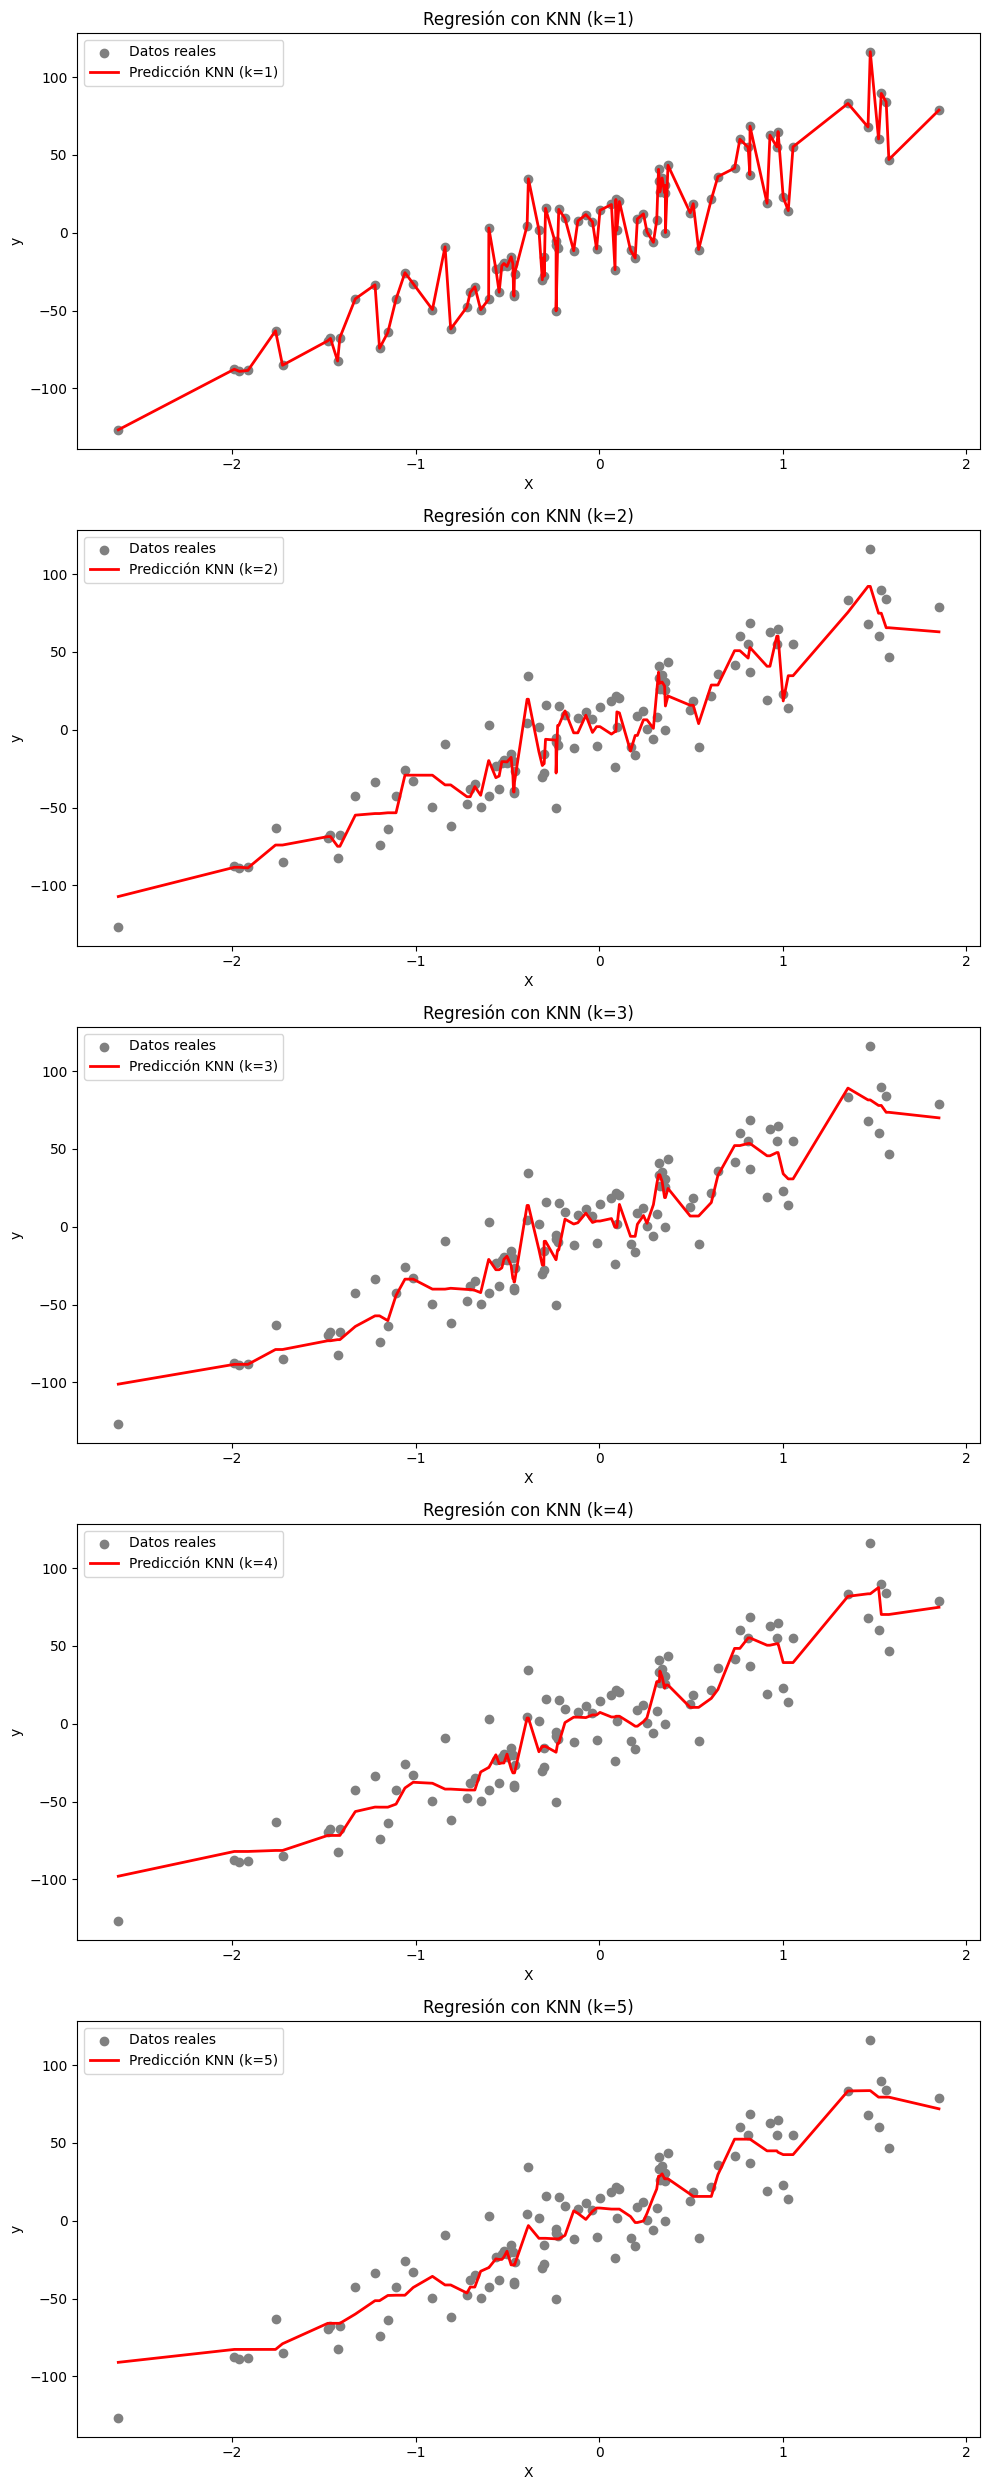

In [60]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

# Crear datos sint√©ticos para regresi√≥n
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Ordenar los datos para visualizaci√≥n
X_plot = np.sort(X, axis=0)

# N√∫mero de subgr√°ficas (n√∫mero de valores de k)
n_k_values = 5  # o cualquier otro n√∫mero seg√∫n tus necesidades

# Crear figura
fig, axes = plt.subplots(n_k_values, 1, figsize=(10, 5 * n_k_values))  # Ajustar tama√±o de la figura

# Iterar para distintos valores de k
for k in range(1, n_k_values + 1):  # Ajusta el rango si quieres m√°s o menos valores de k
    # Entrenar modelo de regresi√≥n KNN
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X, y)

    # Predicci√≥n con KNN
    y_pred = knn_reg.predict(X_plot)

    # Graficar resultados
    ax = axes[k - 1]  # Seleccionar el eje correspondiente para cada gr√°fico
    ax.scatter(X, y, color="gray", label="Datos reales")
    ax.plot(X_plot, y_pred, color="red", linewidth=2, label=f"Predicci√≥n KNN (k={k})")
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.set_title(f"Regresi√≥n con KNN (k={k})")
    ax.legend()

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.savefig("knn_regresi√≥n.png")

# Mostrar la figura con los subgr√°ficos
plt.show()


Precisi√≥n del modelo: 0.94

Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



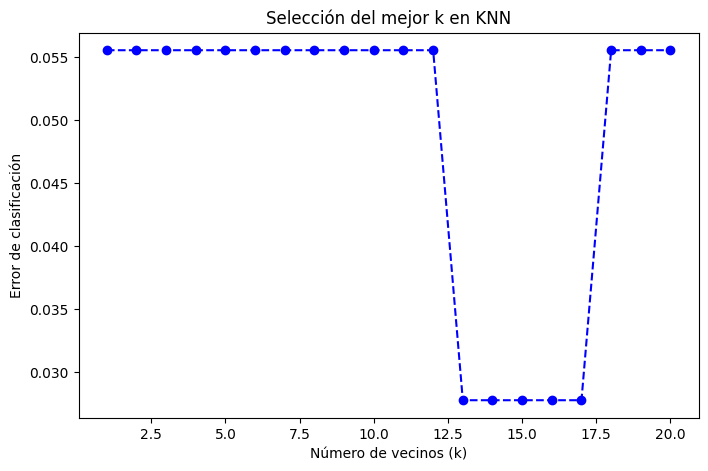

In [61]:
### üìå **Paso 1: Importar librer√≠as**
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


### üìå **Paso 2: Cargar y preparar los datos**
# Cargar dataset Wine
dataset = load_wine()
X = dataset.data  # Caracter√≠sticas qu√≠micas del vino
y = dataset.target  # Tipos de vino

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### üìå **Paso 3: Normalizar los datos**

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### üìå **Paso 4: Entrenar el modelo KNN**

# Definir modelo con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


### üìå **Paso 5: Evaluar el modelo**

# Predicciones
y_pred = knn.predict(X_test)

# M√©tricas de desempe√±o
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisi√≥n del modelo: {accuracy:.2f}")
print("\nReporte de Clasificaci√≥n:\n", classification_report(y_test, y_pred))

### üìå **Paso 6: Selecci√≥n del mejor *k***

errors = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(1 - accuracy_score(y_test, y_pred))  # Error = 1 - precisi√≥n

# Graficar el error en funci√≥n de k
plt.figure(figsize=(8, 5))
plt.plot(k_range, errors, marker='o', linestyle='dashed', color='b')
plt.xlabel('N√∫mero de vecinos (k)')
plt.ylabel('Error de clasificaci√≥n')
plt.title('Selecci√≥n del mejor k en KNN')
plt.show()


### üëâ **Conclusi√≥n**: Elegimos el *k* donde el error es m√°s bajo.



---

## ‚úÖ **4. Conclusiones y Consideraciones**
- **KNN es simple e intuitivo**, pero su rendimiento depende de la m√©trica de distancia y el valor de *k*.
- **La normalizaci√≥n de datos es crucial**, ya que KNN se basa en distancias.
- **No escala bien en grandes vol√∫menes de datos**, ya que su tiempo de consulta crece con el n√∫mero de muestras.
- **Existen m√©todos m√°s eficientes**, como √°rboles de decisi√≥n o SVM, en datasets grandes.


